#### 尝试不同optimizer对模型进行训练，观察对比loss结果

In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
olivetti_faces = fetch_olivetti_faces(data_home='./face_data', shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target)

In [5]:
dataset = [(img,lbl) for img,lbl in zip(images, targets)]
dataset[0]

(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]), tensor(13))

In [6]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [8]:
def build_model_objects(optim_strategy):

    model = nn.Sequential(
        nn.Linear(4096, 8192),
        nn.BatchNorm1d(8192),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(8192, 16384),
        nn.BatchNorm1d(16384),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(16384, 1024),
        nn.BatchNorm1d(1024),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(1024, 40)
    )  # 模型结构搬到GPU内存中
    criterion = nn.CrossEntropyLoss()  # 损失函数
    if optim_strategy == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    elif optim_strategy == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
    elif optim_strategy == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    else:
        raise ValueError("Invalid optimization strategy")
    return model, criterion, optimizer

In [9]:
loss_hist = {}

for optimizer_name in ['SGD', 'RMSprop', 'Adam']:

    model, criterion, optimizer = build_model_objects(optimizer_name)
    loss_hist[optimizer_name] = []
    model.to(device)  # 模型搬到GPU内存中

    model.train()
    for i in range(20):
        for img,lbl in dataloader:
            img,lbl = img.to(device), lbl.to(device)  # 数据和模型在同一个设备端
            result = model(img)
            loss = criterion(result, lbl)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            loss_hist[optimizer_name].append(loss.item())
            print(f'epoch:{i+1} optimizer:{optimizer_name} loss:{loss.item():.4f}')

epoch:1 optimizer:SGD loss:3.7722
epoch:1 optimizer:SGD loss:3.7000
epoch:1 optimizer:SGD loss:3.6665
epoch:1 optimizer:SGD loss:3.4130
epoch:1 optimizer:SGD loss:3.8705
epoch:1 optimizer:SGD loss:3.7343
epoch:1 optimizer:SGD loss:3.8607
epoch:1 optimizer:SGD loss:4.0460
epoch:1 optimizer:SGD loss:3.6661
epoch:1 optimizer:SGD loss:3.4500
epoch:1 optimizer:SGD loss:4.0544
epoch:1 optimizer:SGD loss:3.9399
epoch:1 optimizer:SGD loss:4.1885
epoch:1 optimizer:SGD loss:3.6843
epoch:1 optimizer:SGD loss:3.9822
epoch:1 optimizer:SGD loss:3.9833
epoch:1 optimizer:SGD loss:3.5945
epoch:1 optimizer:SGD loss:3.5572
epoch:1 optimizer:SGD loss:3.5510
epoch:1 optimizer:SGD loss:3.9308
epoch:1 optimizer:SGD loss:3.3864
epoch:1 optimizer:SGD loss:3.7779
epoch:1 optimizer:SGD loss:3.7708
epoch:1 optimizer:SGD loss:3.8358
epoch:1 optimizer:SGD loss:3.6491
epoch:1 optimizer:SGD loss:3.9335
epoch:1 optimizer:SGD loss:3.3035
epoch:1 optimizer:SGD loss:3.7194
epoch:1 optimizer:SGD loss:3.5298
epoch:1 optimi

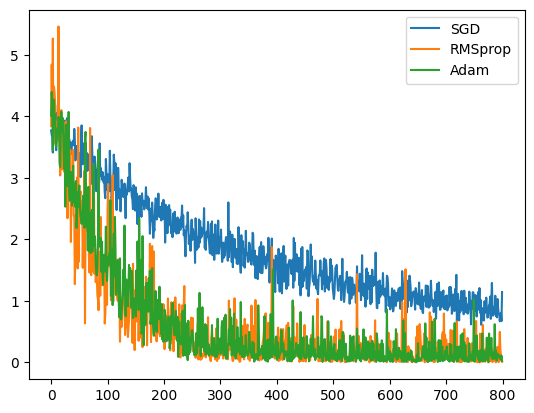

In [10]:
for opt in ['SGD', 'RMSprop', 'Adam']:
    plt.plot(range(len(loss_hist[opt])), loss_hist[opt], label=opt)
    plt.legend()
plt.show()